## analyze calman filter output data
The "ExtendedKF" function has three options "fusion","onlyRadar","onlyLidar". So there is there type of log file.
This ipynb(python)file is to readin these file, and output it in visulization.

In [24]:
#fusion data variables
fusion_cycleNumber = []
fusion_x0,fusion_x1,fusion_x2,fusion_x3 = [],[],[],[]
fusion_px,fusion_py = [],[]
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3 = [],[],[],[]
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy = [],[],[],[]
fusion_NIS_laser, fusion_NIS_radar = [],[]

#lidar data
lidar_cycleNumber = []
lidar_x0,lidar_x1,lidar_x2,lidar_x3 = [],[],[],[]
lidar_px,lidar_py = [],[]
lidar_gt0,lidar_gt1,lidar_gt2,lidar_gt3 = [],[],[],[]
lidar_RMSE_x,lidar_RMSE_y,lidar_RMSE_vx,lidar_RMSE_vy = [],[],[],[]
lidar_NIS_laser, lidar_NIS_radar = [],[]

#radar data
radar_cycleNumber = []
radar_x0,radar_x1,radar_x2,radar_x3 = [],[],[],[]
radar_px,radar_py = [],[]
radar_gt0,radar_gt1,radar_gt2,radar_gt3 = [],[],[],[]
radar_RMSE_x,radar_RMSE_y,radar_RMSE_vx,radar_RMSE_vy = [],[],[],[]
radar_NIS_laser, radar_NIS_radar = [],[]

In [25]:
import re

# read EKF datalog, output the data to lists
def read_datalog(logname):
    biglist = []
    for line in open(logname):
        numberlist = []
        for myword in re.findall(r"[-]?\d+\.?\d*",line):
            numberlist.append(float(myword))
        biglist.append(numberlist)
        
    cycle_number = []
    x0 = []
    x1 = []
    x2 = []
    x3 = []
    px = []
    py = []
    gt0 = []
    gt1 = []
    gt2 = []
    gt3 = []
    RMSE_x = []
    RMSE_y = []
    RMSE_vx = []
    RMSE_vy = []
    NIS_laser = []
    NIS_radar = []

    j = 0
    for mylist in biglist:
        j = j + 1
        #print(j)
        if j > 2 :
            cycle_number.append(mylist[0])
            x0.append(mylist[1])
            x1.append(mylist[2])
            x2.append(mylist[3])
            x3.append(mylist[4])
            px.append(mylist[5])
            py.append(mylist[6])
            gt0.append(mylist[7])
            gt1.append(mylist[8])
            gt2.append(mylist[9])
            gt3.append(mylist[10])
            RMSE_x.append(mylist[11])
            RMSE_y.append(mylist[12])
            RMSE_vx.append(mylist[13])
            RMSE_vy.append(mylist[14])
            NIS_laser.append(mylist[15])
            NIS_radar.append(mylist[16])
        
    print("data length is: ",len(x0))
    
    return cycle_number,x0,x1,x2,x3,px,py,gt0,gt1,gt2,gt3,RMSE_x,RMSE_y,\
           RMSE_vx,RMSE_vy,NIS_laser,NIS_radar

## Noise parameter: std_a = 30, std_yawdd = 30

data length is:  497


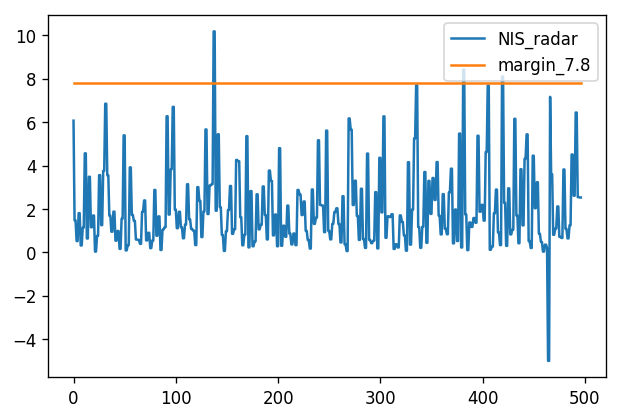

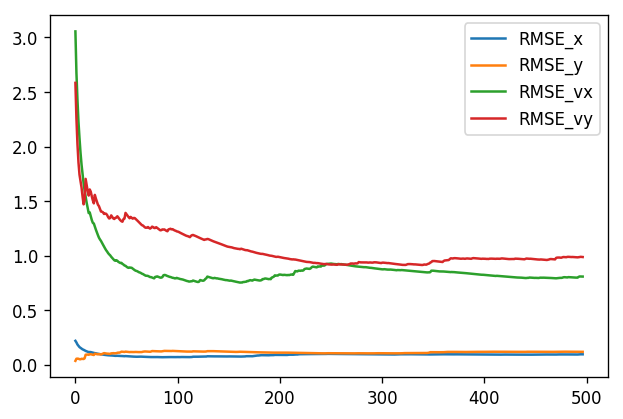

In [10]:
# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy, \
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_30.txt")

x = []
y_margin = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    y_margin.append(7.8)

import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
#pl.plot(x,fusion_NIS_laser,label='NIS_laser')# use pylab to plot x and y
pl.plot(x,fusion_NIS_radar,label='NIS_radar')# use pylab to plot x and y
pl.plot(x,y_margin,label='margin_7.8')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_RMSE_x,label='RMSE_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_vy')# use pylab to plot x and y

pl.legend(loc='upper right')
pl.show()# show the plot on the screen

## Noise parameter:  std_a = 10, std_yawdd = 10

data length is:  497


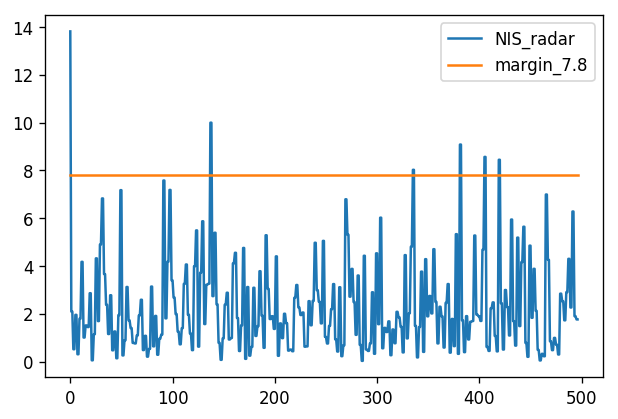

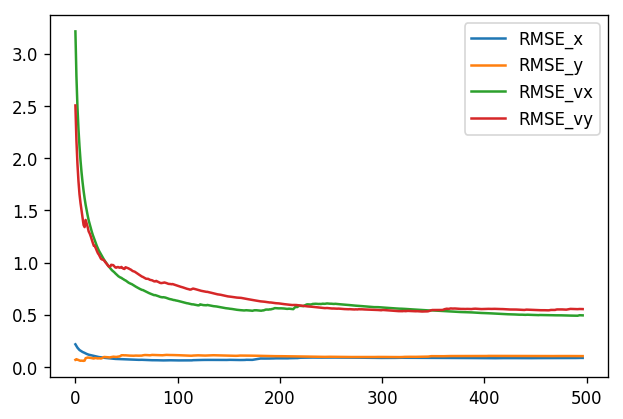

In [12]:
# std_a_ = 10;
# std_yawdd_ = 10;

# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy, \
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_10.txt")

x = []
y_margin = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    y_margin.append(7.8)
    
import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_NIS_radar,label='NIS_radar')# use pylab to plot x and y
pl.plot(x,y_margin,label='margin_7.8')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_RMSE_x,label='RMSE_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_vy')# use pylab to plot x and y

pl.legend(loc='upper right')
pl.show()# show the plot on the screen

## Noise parameter:  std_a = 3, std_yawdd = 3

data length is:  497


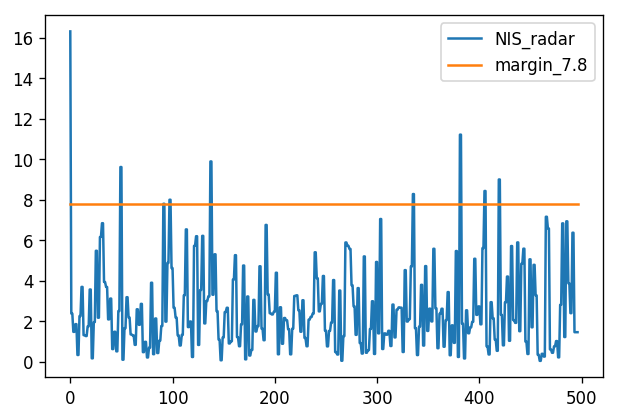

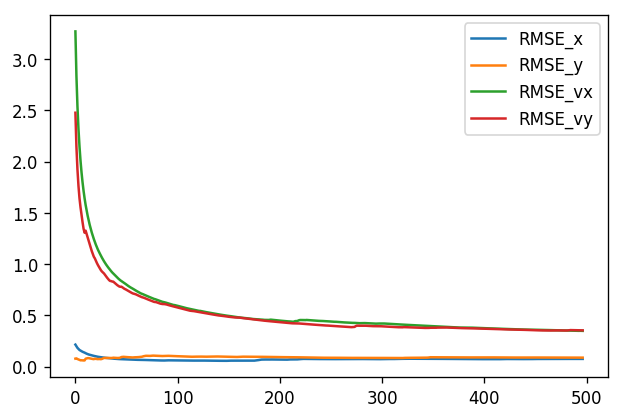

In [13]:
# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy, \
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_3.txt")

x = []
y_margin = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    y_margin.append(7.8)
    
import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_NIS_radar,label='NIS_radar')# use pylab to plot x and y
pl.plot(x,y_margin,label='margin_7.8')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_RMSE_x,label='RMSE_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_vy')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

## Noise parameter:  std_a = 1, std_yawdd = 1

data length is:  497


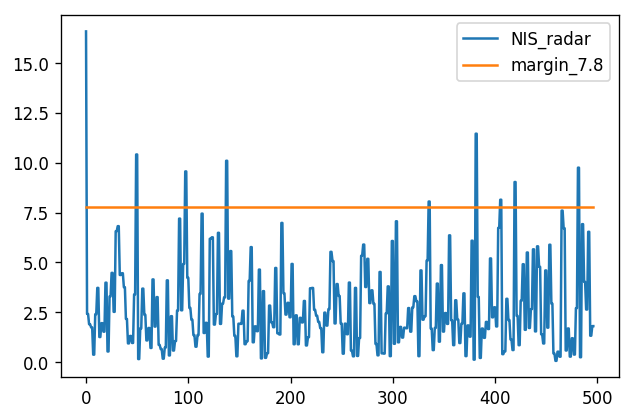

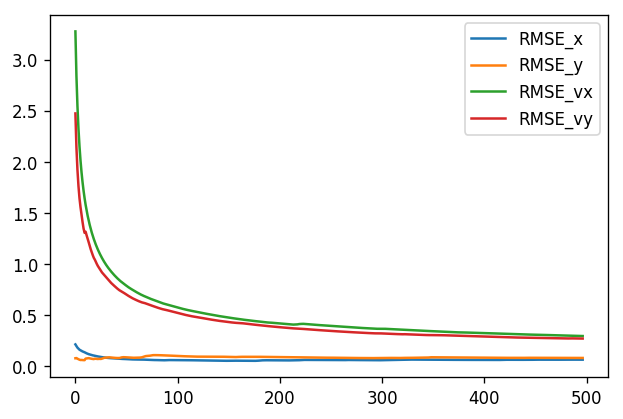

In [26]:
# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy, \
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_1.txt")

x = []
y_margin = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    y_margin.append(7.8)
    
import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_NIS_radar,label='NIS_radar')# use pylab to plot x and y
pl.plot(x,y_margin,label='margin_7.8')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_RMSE_x,label='RMSE_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_vy')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

## Noise parameter:  std_a = 0.3, std_yawdd = 0.3

data length is:  497


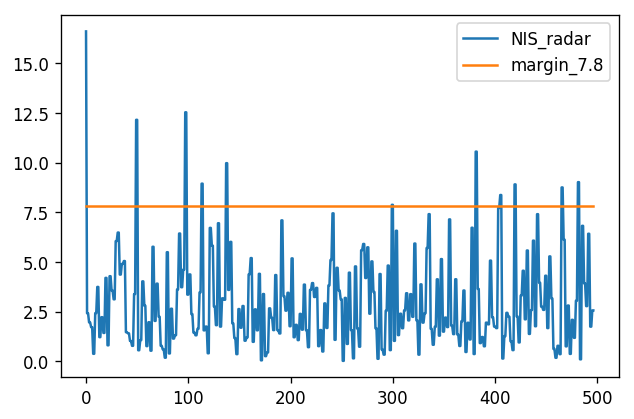

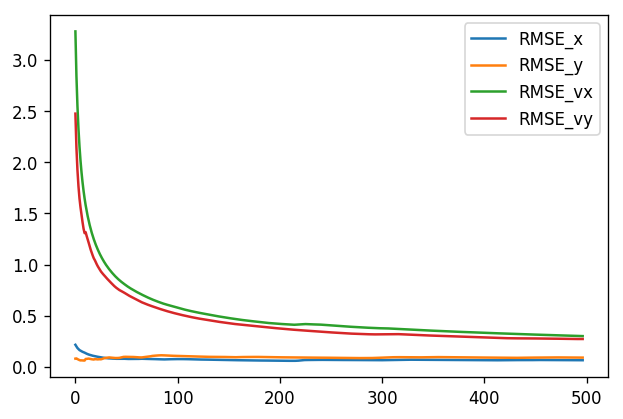

In [19]:
# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy, \
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_0.3.txt")

x = []
y_margin = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    y_margin.append(7.8)
    
import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_NIS_radar,label='NIS_radar')# use pylab to plot x and y
pl.plot(x,y_margin,label='margin_7.8')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_RMSE_x,label='RMSE_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_vy')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

## Noise parameter:  std_a = 0.3, std_yawdd = 0.3

data length is:  497


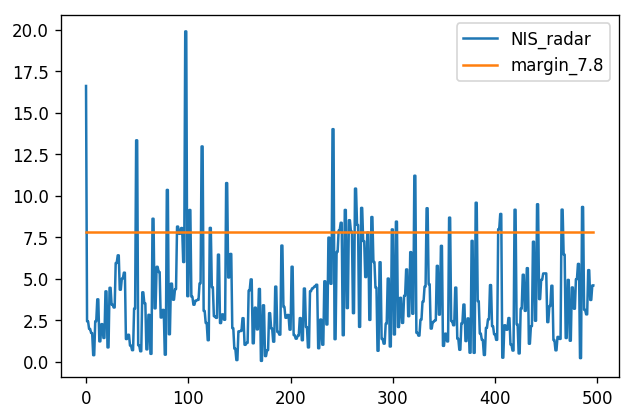

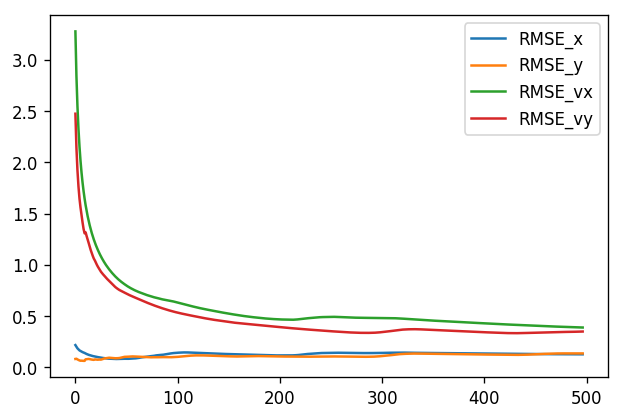

In [20]:
# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy, \
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_0.1.txt")

x = []
y_margin = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    y_margin.append(7.8)
    
import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_NIS_radar,label='NIS_radar')# use pylab to plot x and y
pl.plot(x,y_margin,label='margin_7.8')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,fusion_RMSE_x,label='RMSE_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_vy')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

data length is:  497
data length is:  497
data length is:  497


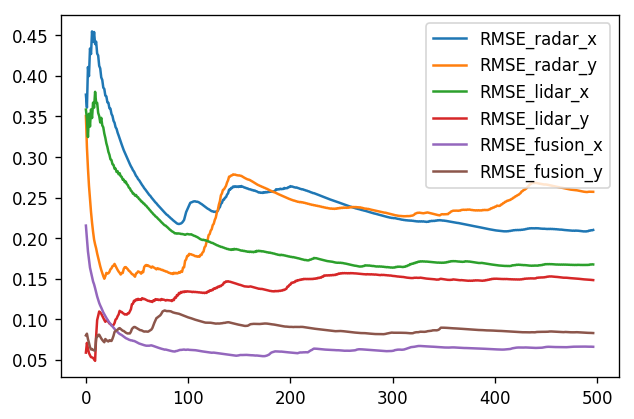

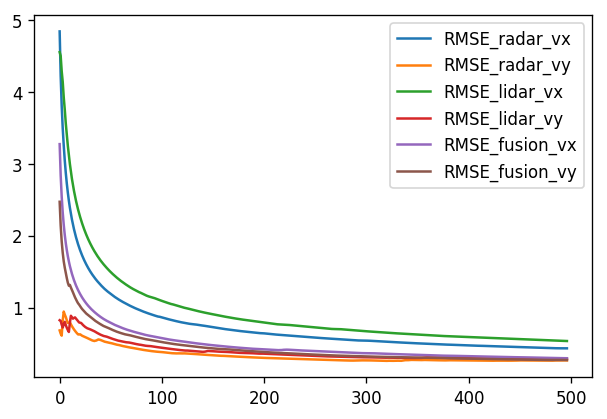

In [31]:
# read fusion data to list
fusion_cycleNumber,fusion_x0,fusion_x1,fusion_x2,fusion_x3,fusion_px,fusion_py,\
fusion_gt0,fusion_gt1,fusion_gt2,fusion_gt3,\
fusion_RMSE_x,fusion_RMSE_y,fusion_RMSE_vx,fusion_RMSE_vy,\
fusion_NIS_laser, fusion_NIS_radar\
= read_datalog(logname = "ukf_log_1.txt")

# read lidar data to list
lidar_cycleNumber,lidar_x0,lidar_x1,lidar_x2,lidar_x3,lidar_px,lidar_py,\
lidar_gt0,lidar_gt1,lidar_gt2,lidar_gt3,\
lidar_RMSE_x,lidar_RMSE_y,lidar_RMSE_vx,lidar_RMSE_vy,\
lidar_NIS_laser, lidar_NIS_radar\
= read_datalog(logname = "ukf_log_1_lidar.txt")

# read radar data to list
radar_cycleNumber,radar_x0,radar_x1,radar_x2,radar_x3,radar_px,radar_py,\
radar_gt0,radar_gt1,radar_gt2,radar_gt3,\
radar_RMSE_x,radar_RMSE_y,radar_RMSE_vx,radar_RMSE_vy,\
radar_NIS_laser, radar_NIS_radar\
= read_datalog(logname = "ukf_log_1_radar.txt")

x = []
for i in range(0, len(fusion_x0)):
    x.append(i)
    
    
import numpy as np
import pylab as pl

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,radar_RMSE_x,label='RMSE_radar_x')# use pylab to plot x and y
pl.plot(x,radar_RMSE_y,label='RMSE_radar_y')# use pylab to plot x and y
pl.plot(x,lidar_RMSE_x,label='RMSE_lidar_x')# use pylab to plot x and y
pl.plot(x,lidar_RMSE_y,label='RMSE_lidar_y')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_x,label='RMSE_fusion_x')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_y,label='RMSE_fusion_y')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

pl.figure(figsize=(6,4), dpi=120)
pl.plot(x,radar_RMSE_vx,label='RMSE_radar_vx')# use pylab to plot x and y
pl.plot(x,radar_RMSE_vy,label='RMSE_radar_vy')# use pylab to plot x and y
pl.plot(x,lidar_RMSE_vx,label='RMSE_lidar_vx')# use pylab to plot x and y
pl.plot(x,lidar_RMSE_vy,label='RMSE_lidar_vy')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vx,label='RMSE_fusion_vx')# use pylab to plot x and y
pl.plot(x,fusion_RMSE_vy,label='RMSE_fusion_vy')# use pylab to plot x and y
pl.legend(loc='upper right')
pl.show()# show the plot on the screen

from the trace diagram, we also could see that , the fusion result is better than only-radar or only-lidar